# Speaker Accent Recognition Using MFCCs

## 1. Domain Knowledge

Accent recognition is classification of the speaker accent from an input signal. Classifying accents can provide information about a speaker’s nationality and heritage, which can help identify topics more relevant to the user, for the purposes of search results and advertisements. Typical applications include online banking, telephone shopping, and security applications.
Typically, the input signal is represented in frequency domain then dimensionality reduction can be performed together with feature extraction.

<img src="images/1.jpg" />

A common feature extraction technique for the purpose of speech recognition is Mel-frequency cepstral coefficients or MFCCs. MFCCs are coefficients that collectively make up an MFC (mel-frequency cepstrum) which is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.
The main idea of MFCC is to transform the signal from time domain to frequency domain and to map the transformed signal in hertz onto Mel-scale due to the fact that 1 kHz is a threshold of humans’ hearing ability.

MFCCs are commonly derived as follows: 

1.	Take the absolute value of the short time Fourier transform of (a windowed excerpt of) a signal.
2.	Map the powers of the spectrum obtained above onto the mel scale
3.	Take the logs of the powers at each of the mel frequencies.
4.	Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
5.	The MFCCs are the amplitudes of the resulting spectrum.
6.	Return the first $q$ MFCCs.

MFCC values are not very robust in the presence of additive noise, and so it is common to normalise their values in speech recognition systems to lessen the influence of noise. (energy terms)


<img src="images/2.png" />


## 2. Dataset
   ### 2.1 Source
   
A total of 329 signal data were collected from the voice of 22 speakers 11 female and 11 male of accented speakers speaking English, containing 165 US voice and 164 non-US voice from 5 countries: Spain, France, Germany, Italy, and UK.

The sound tracks have lengths of only around 1 second, with a sampling rate of 44,100 Hz, each sound track vector on the time domain has more than 30,000 entries. Because of the method used in collecting the data, there is no background noise in any sound tracks.

The 12th lowest order melfrequency cepstral coefficients (MFCCs) of the audio signals are used as inputs to the algorithms.

The Source of both audio files and MFCC spreadsheet available at UCI at the following link https://archive.ics.uci.edu/ml/datasets/Speaker+Accent+Recognition


   ### 2.2 Problem formulation
   
This accent reognition is a classification problem and the response variable $yi$ is givn by:

$$
y_i = \left\{
    \begin{array}\\
        0, \space \space ES\\
        1, \space \space FR\\
        2, \space \space GE\\
        3, \space \space IT\\
        4, \space \space UK\\
        5, \space \space US 
    \end{array}
\right.
$$

showing that there are 6 class labels 

The design is **balanced in terms of US/NOT US accent but we want to extend the problem to classify all accents, hence imbalanced problem**


## 3. Related Work 

[1] is the original paper to analyze the speaker accent recognition dataset . Binary classification is performed in this paper classifying audio samples into US accent or non-US accent (the balanced case) 
[2] is the only work considers the imbalanced case only by comparing the model performance using alternative metrics like MSE, Kappa, precision and recall 
In my work, I tackled the imbalanced case implementing the state-of-the-art imbalaced learning algorithms  

   ## 4. Data Exploration 

In [2]:
#importing libs
import numpy as np
import pandas as pd

In [3]:
# import dataset
df = pd.read_csv("accent-mfcc-data-1.csv") 

In [4]:
index = df.index
columns = df.columns
values = df.values

In [5]:
#dimension of dataset
df.shape #or values.shape

(329, 13)

In [6]:
#peek at the data
df.head(3)

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144


In [7]:
# list the levels for the class
df['language'].unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

In [8]:
# Grab your wav 
from scipy.io import wavfile
mywav = '../accent-recognition-mfcc--1/ES-M-1-1.wav'
rate, data = wavfile.read(mywav)
print ('Length in time (s): ', np.shape(data)[0]/float(rate))

Length in time (s):  0.7169160997732427


In [9]:
# pip install ipython
import IPython.display
IPython.display.Audio(data=data,rate=rate)

In [10]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import wave

In [11]:
pd.set_option('display.max_colwidth', None)

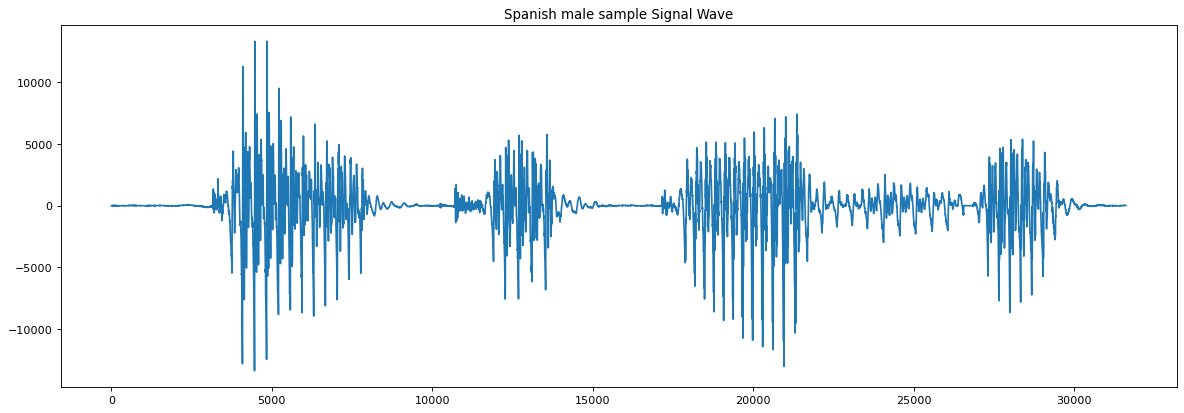

In [12]:
spf = wave.open("../accent-recognition-mfcc--1/ES-M-1-1.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")

# plt spanish male wave sample
figure(figsize=(18,6), dpi=80)
plt.title("Spanish male sample Signal Wave")
plt.plot(signal)

plt.show()

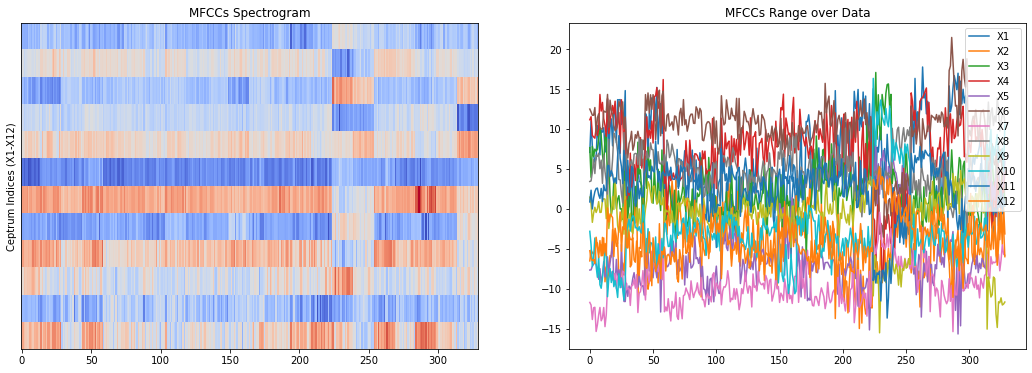

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))

#mfcc spectrogram
from matplotlib import cm
mfcc_data= np.swapaxes(df.drop(['language'], axis=1), 0 ,1)
ax1.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax1.set(xlabel='', ylabel='Ceptrum Indices (X1-X12)', title='MFCCs Spectrogram')
ax1.axes.yaxis.set_ticks([])

ax2.plot(df.iloc[:,1:13])
ax2.set(xlabel='', ylabel='', title='MFCCs Range over Data')
ax2.legend(list(df.iloc[:,1:13].columns), loc='upper right')

plt.show()

As shown below, the collected data has more (US) accent data than all of the other five countries i.e. distribution of examples across the known classes is biased or skewed. The distribution is neither slight biased nor severe imbalanced. The majority class is about 5th times each of the other classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance for the minority class.

US    165
UK     45
FR     30
IT     30
GE     30
ES     29
Name: language, dtype: int64


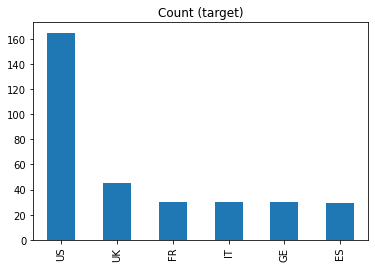

In [14]:
# Class Distribution (imbalance check)
print(df.language.value_counts())
df.language.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
print(df.language.value_counts(normalize=True))

US    0.501520
UK    0.136778
FR    0.091185
IT    0.091185
GE    0.091185
ES    0.088146
Name: language, dtype: float64


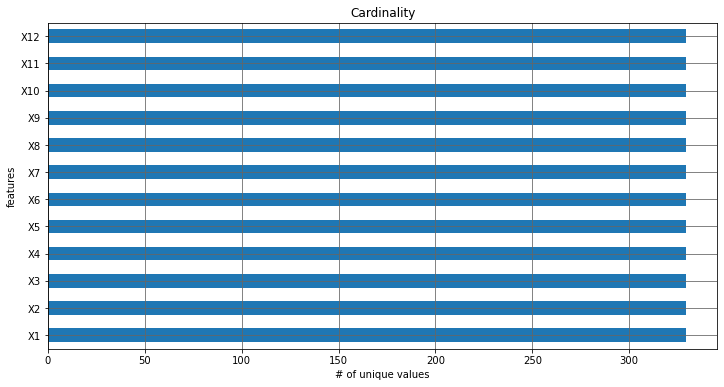

In [16]:
#checking the cardinality of the columns (count unique values in columns)
df.iloc[:,1:13].nunique().plot.barh(figsize=(12,6))
plt.ylabel('features')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel('# of unique values')
plt.title('Cardinality')
plt.show()

In [17]:
# cardin = [predictors[col].nunique() for col in predictors.columns.tolist()]
# cols = [col for col in predictors.columns.tolist()]
# d = {k:v for (k, v) in zip(cols,cardin)}
# cardinal = pd.DataFrame(list(d.items()), columns=['column', 'cardinality'])
# cardinal.sort_values('cardinality',ascending=False)

As the plot shows the variety of values in the predictors (Cardinality) is high 

In [18]:
"""
 checking missing values 
 that is data=zero in this case because The MFCCs are the amplitudes of the resulting spectrum
  and zero is the only value doesnt make sense in this case

  we know already from UCI page that all data are presented am just following the standard prosudres
"""
print(df.isnull().sum())
#df.columns[df.isnull().sum()>0] index of columns with null

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64


No missing Values in our dataset

In [19]:
#Statistical Summary
df.describe() 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


The stastical summary supports what we saw in the MFCC plot that in numerical values lies in the window [-16, 21] with similar and low standard deviation is between [2.4 5.1], though **no scaling is needed**  

In [20]:
#types of attributes
df.dtypes
# all float

language     object
X1          float64
X2          float64
X3          float64
X4          float64
X5          float64
X6          float64
X7          float64
X8          float64
X9          float64
X10         float64
X11         float64
X12         float64
dtype: object

all independent variables (MFCCs) are numerical only to change dependant variable "language" to categorial 

In [21]:
# change the target datatype in order to encode 
df["language"] = df["language"].astype('category') 
df.dtypes

language    category
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
X10          float64
X11          float64
X12          float64
dtype: object

In [22]:
# text coding needed for visualize and process 
language=df['language']

df["language_coded"] = df["language"].cat.codes #add another col holds categories codes (initially will be integer)
df["language_coded"] = df["language_coded"].astype('category')  #(change the col datatype to category)
df=df.drop(['language'], axis=1) # drop the old language col
df.dtypes

X1                 float64
X2                 float64
X3                 float64
X4                 float64
X5                 float64
X6                 float64
X7                 float64
X8                 float64
X9                 float64
X10                float64
X11                float64
X12                float64
language_coded    category
dtype: object

In [23]:
# list new for the class 
df['language_coded'].unique()
print(df.language_coded.value_counts())

5    165
4     45
3     30
2     30
1     30
0     29
Name: language_coded, dtype: int64


['ES', 'FR', 'GE', 'IT', 'UK', 'US'] = [0, 1, 2, 3, 4, 5]

In [24]:
predictors=df.iloc[:,:-1] #df.iloc[:,0:12]
target=df.iloc[:,-1:] #df.iloc[:,12:13]    =#target = 'language_coded'

## 5. Data Distribution

**Many classification algorithms, assumes variables to follow a particular distribution (specially Gaussian distribution)**. The cost of not meeting the assumptions could be high at times.

In statistics, **D'Agostino-Pearson's** test, is a goodness-of-fit measure of departure from normality, that is the test aims to establish whether or not the given sample comes from a normally distributed population. The test is based on transformations of the sample kurtosis and skewness, and has power only against the alternatives that the distribution is skewed and/or kurtic.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

According to the D’Agostino-Pearson test, the data is normally distributed when the test statistic $Z^2_K+Z^2_S$ has a chi-square distribution with 2 degrees of freedom

In [25]:
'''
  
  stats.normaltest function tests the null hypothesis that a sample comes from a 
  normal distribution It is based on D’Agostino and Pearson’s test that combines 
  skew and kurtosis to produce an omnibus test of normality
  
  Usually, a significance level (denoted as α or alpha) of 0.05 (standard) indicates 
  that the risk of concluding the data do not follow a normal distribution—when, 
  actually, the data do follow a normal distribution—is 5%.

'''

from scipy import stats
for i in range(len(df.columns)-1):
    k2, p = stats.normaltest(df.iloc[:,i:i+1])
    alpha = 0.05 #1e-3
#     print("p = {}".format(p))
    print(df.columns[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected") #not normal
    else:
        print("The null hypothesis cannot be rejected") #normal

X1
The null hypothesis can be rejected
X2
The null hypothesis cannot be rejected
X3
The null hypothesis can be rejected
X4
The null hypothesis can be rejected
X5
The null hypothesis can be rejected
X6
The null hypothesis can be rejected
X7
The null hypothesis can be rejected
X8
The null hypothesis can be rejected
X9
The null hypothesis can be rejected
X10
The null hypothesis can be rejected
X11
The null hypothesis can be rejected
X12
The null hypothesis can be rejected


Only X2 comes from normal distribution for a $\rho$ of 5%

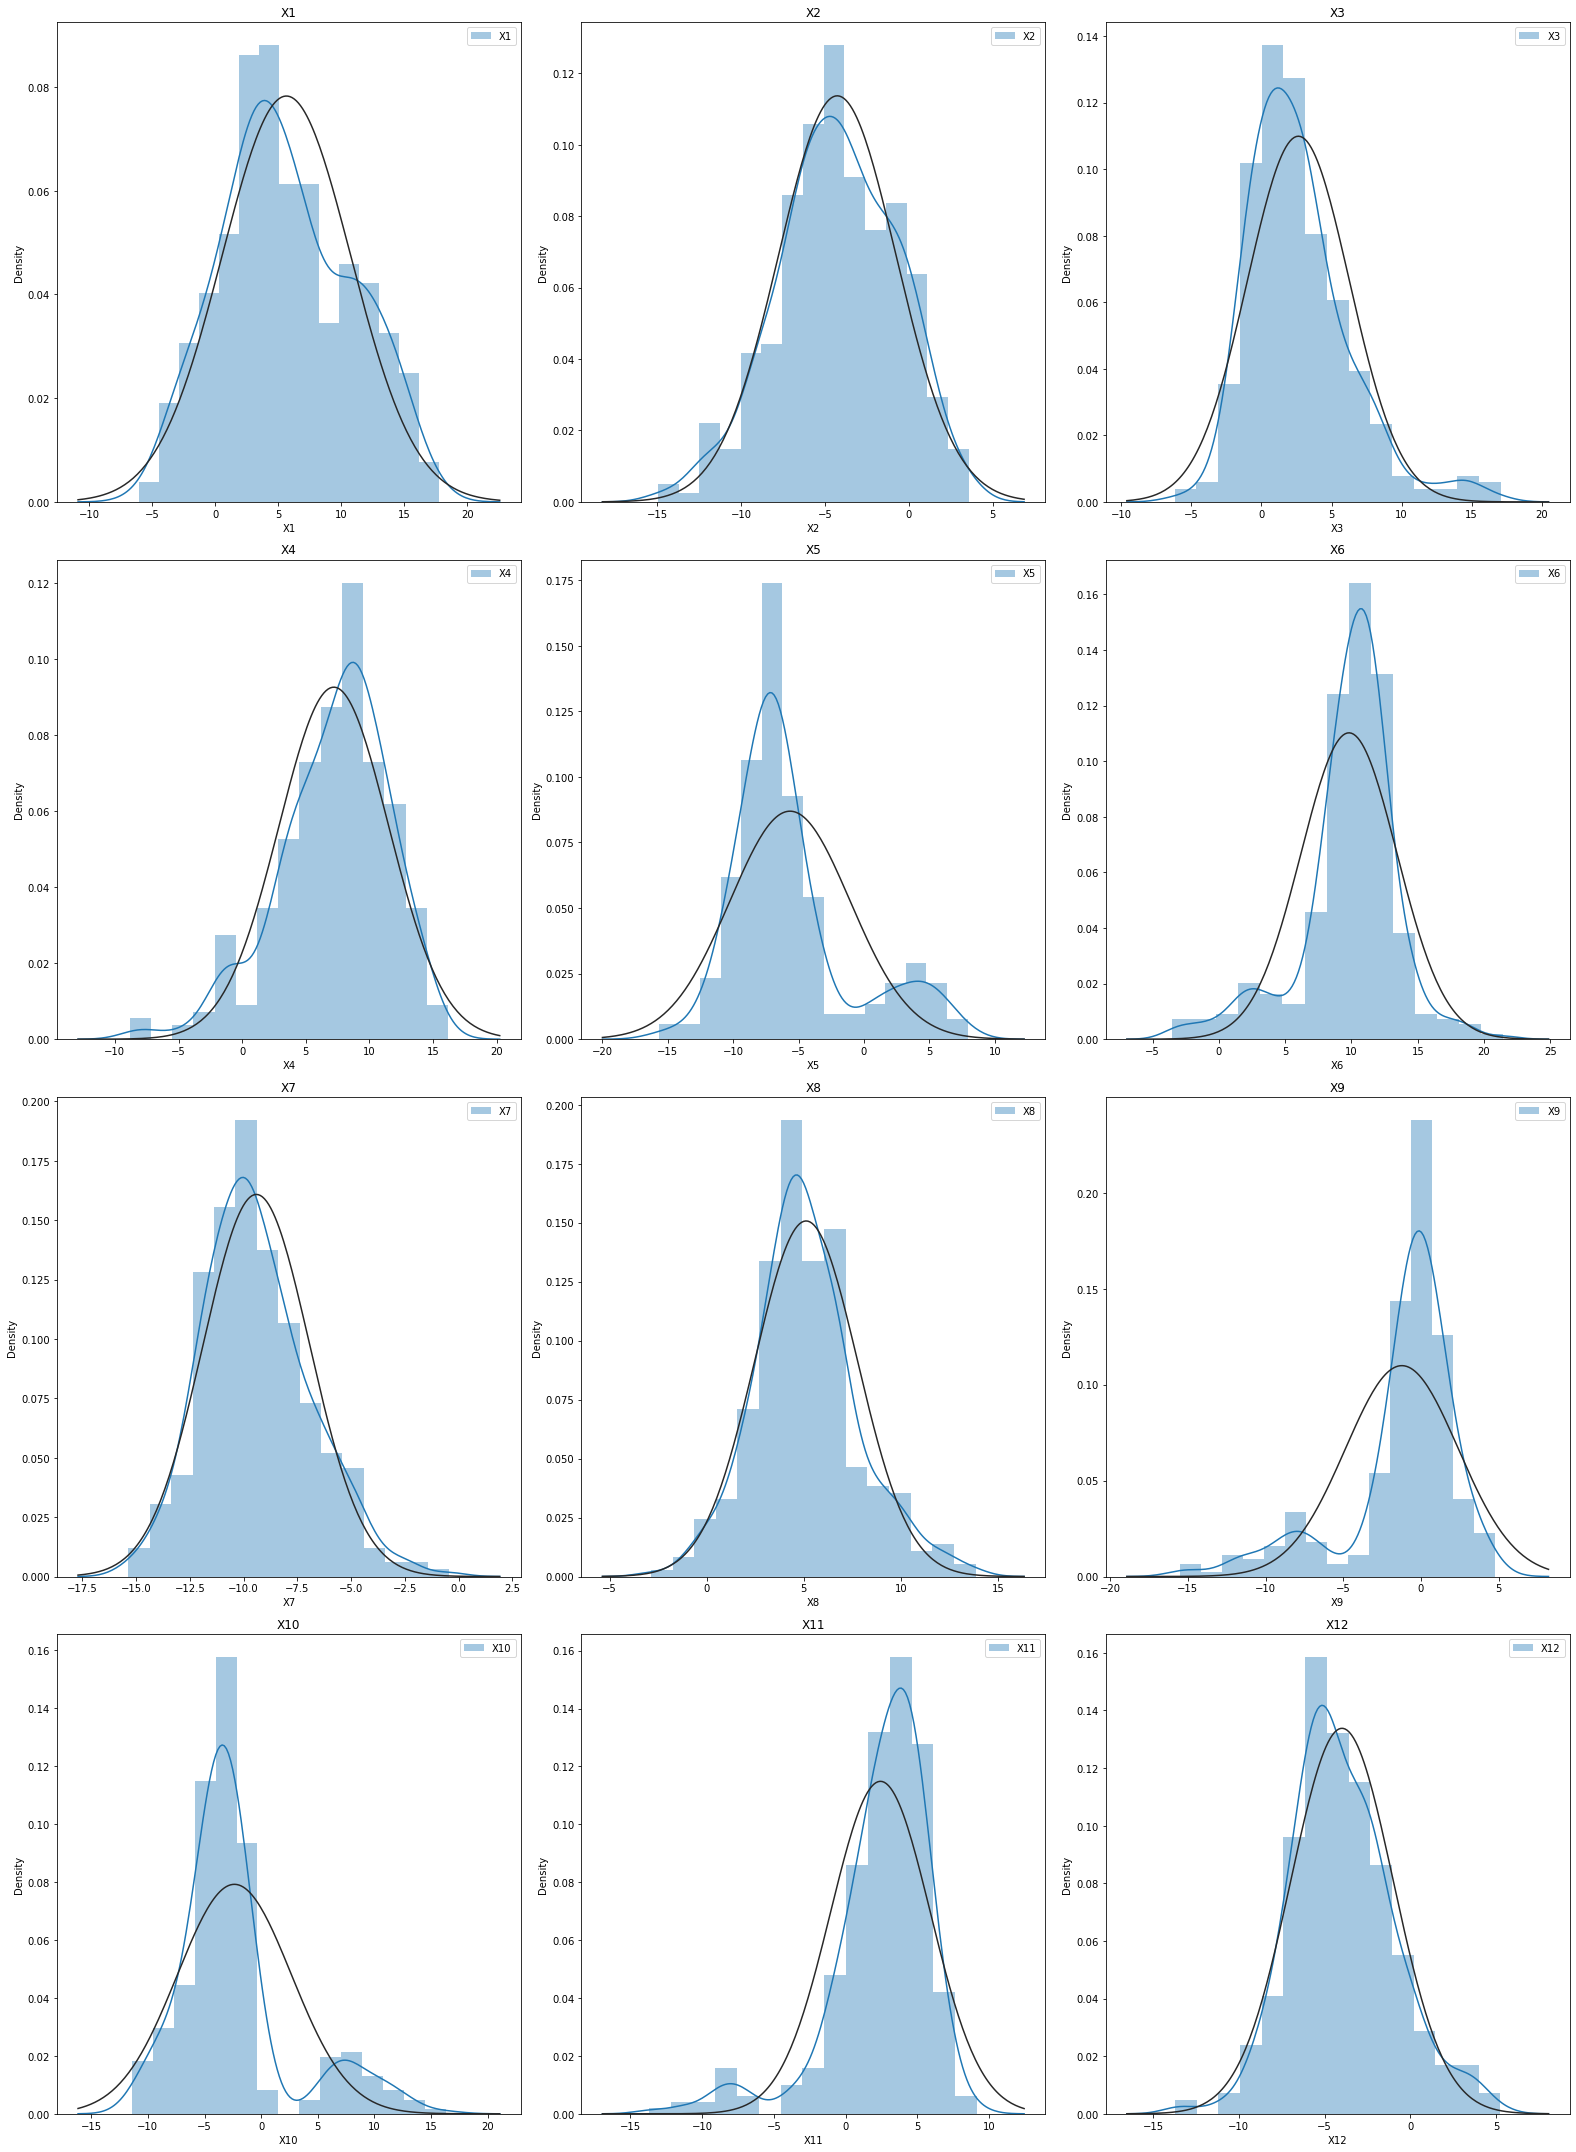

In [187]:
from scipy.stats import norm
import seaborn as sns

plt.figure(figsize=(22,30))
try:
    for i, col in enumerate(predictors.columns.to_list()):
        plt.subplot(4, 3, i + 1)
        sns.distplot(df[col], bins=15, fit=norm, label=col)        
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

the figure above shows the plots of the predictors distribution with a histogram and maximum likelihood gaussian distribution fit.

- Only X2 comes close to a normal distribution (confirms the D'Agostino-Pearson's test results)
- X3,X5,X9,X10,X11 have highly skewed distribution, and X4,X6 with moderate Skew distribution

In [26]:
print(predictors.skew())

X1     0.192326
X2    -0.226634
X3     1.131745
X4    -0.743209
X5     1.180070
X6    -0.985631
X7     0.483211
X8     0.394249
X9    -1.637664
X10    1.359030
X11   -1.686876
X12    0.321322
dtype: float64


## 6. Outliers Detection

Outliers are innocent until proven guilty. With that being said, they should not be removed unless there is a good reason for that.
For example, one can notice some weird, suspicious values that are unlikely to happen, and so decides to remove them. Though, they worth investigating before removing.
It is also worth mentioning that some models, like Support Vector Machine, are very sensitive to outliers. In other words, outliers might throw the model off from where most of the data lie.

we will examine two outlier detection techniques and later will compare generated noise-free dataset split against other splits

   ### 6.1 Interquartile Range (IQR)
   
A boxplot can be used to indicate explicitly the presence of outliers. Many inferential procedures are based on the assumption that the population distribution is normal. Even a single extreme outlier/several mild outliers in the sample warns the investigator that such procedures may be unreliable

In the Interquartile Range (IQR) technique, Any observation farther than 1.5fs from the closest fourth is an outlier. An outlier is extreme if it is more than 3fs from the nearest fourth, and it is mild otherwise.

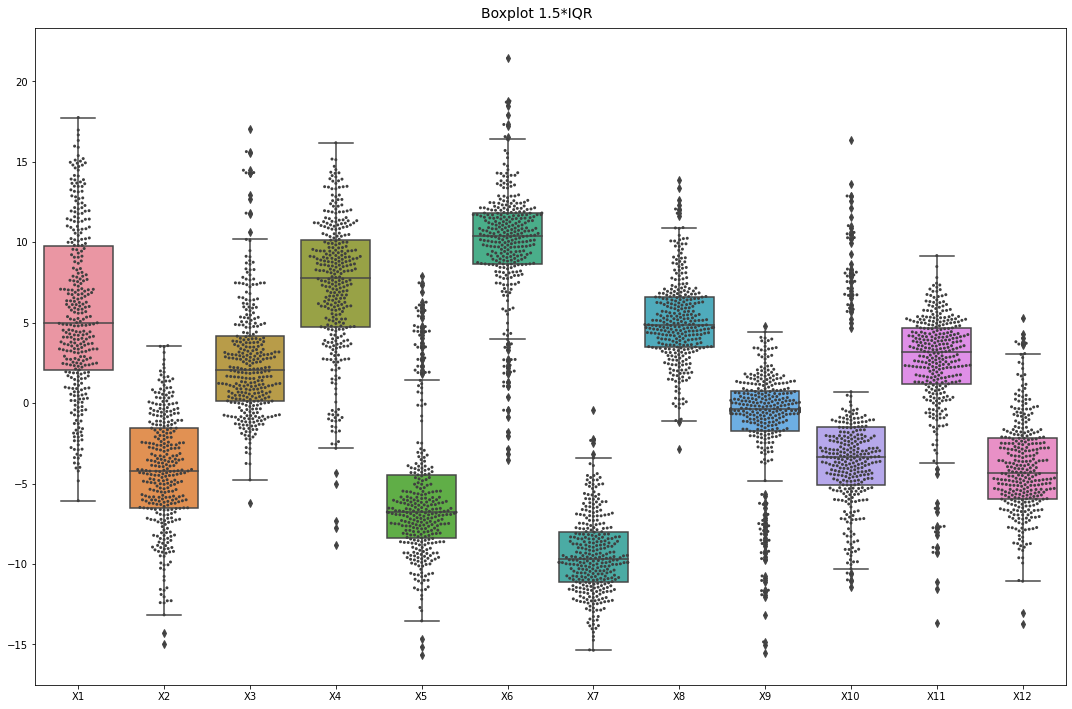

In [189]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot 1.5*IQR', fontsize=14)

ax=sns.boxplot(data=predictors)
ax=sns.swarmplot(data=predictors, color=".25", size=3)

plt.tight_layout()

As we can see from the plot, we notice that X3,X5,X6,X9,X10 and X11 are stacked with many outliers outside the 1.5*IQR 

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#fact: quantile works on numeric dtypes so df.quantile=predictors.quantile

X1     7.728045
X2     4.955514
X3     4.040984
X4     5.428291
X5     3.954376
X6     3.140798
X7     3.131490
X8     3.106763
X9     2.529075
X10    3.577485
X11    3.475663
X12    3.749751
dtype: float64


In [28]:
def outliers_det(df_,th):
    
    df_2cln = df_.copy()
    predictors_=df_2cln.iloc[:,:-1] 
    Q1 = df_2cln.quantile(0.25)
    Q3 = df_2cln.quantile(0.75)
    IQR = Q3 - Q1
    
    #filter out the outliers by keeping only valid values
    # returns True/False list of rows (329) where false=outlier  (.any changes numbers to boolean)
    inliners=~((predictors_< (Q1 - th * IQR)) |(predictors_> (Q3 + th * IQR))).any(axis=1)

    outliers = []
    for i in range(len(df_2cln)):
        if (inliners[i] == False):
            outliers.append(i)  # index of the outlier

    outliers_idx=np.array(outliers)

    noise_df = df_2cln.index.isin(outliers_idx)
    cln_df = df[inliners] #data split#1
    print('noise-free data split created with length = ',len(cln_df))
    print('outliers = ',len(df_2cln)-len(cln_df))
    print("data filtered percentage ="+"{:.2f}" .format((len(df_2cln)-len(cln_df))/len(df_2cln)))
    return outliers_idx,cln_df,noise_df

In [29]:
outliers_indices_iqr,noisefree_iqr_df,outliers_iqr_df = outliers_det(df,1.5)#1.5 cuts more data & given horrible results on classification (trial and error)

noise-free data split created with length =  261
outliers =  68
data filtered percentage =0.21


The filtered data (outliers) percentage according to 1.5*IQR is 21% of the whole data set

### 6.2. Mahalanabois Distance
The Mahalanobis distance between an observation $(x_i)$  and the dataset mean ($\hat{\mu}$) given by:

\begin{equation}
d^2_{\hat{\mu},\hat{\Sigma}}(x_i) =
(x_i-\hat{\mu})^T\hat{\Sigma}^{-1}(x_i-\hat{\mu})
\end{equation}

 $\hat{\mu}, \hat{\Sigma} $ being respectively estimates of the dataset mean and covariance., where $\Sigma$ is a $d\times d$ covariance matrix.

The sample mean and covariance matrix can be quite sensitive to outliers,and that's the reason why Mahalanobis distance is effective on multivariate data is because it uses covariance between variables in order to find the distance of two points. In other words, Mahalanobis calculates the distance between point “P1” and point “P2” by considering standard deviation (how many standard deviations P1 far from P2)

Then, Multivariate outliers can be simply defined as observations having a large squared Mahalanobis distance.

In [30]:
def outliers_maha(df):

    df1=np.array(df)
    cov_matrix = np.cov(df1, rowvar=False) 
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    vars_mean = []
    for i in range(df1.shape[0]):
        vars_mean.append(list(df1.mean(axis=0))) 
    diff = df1 - vars_mean

    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_cov_matrix).dot(diff[i])))

    std = np.std(md)
    k = 2. * std # k = 3. * std if extreme else 2. * std
    m = np.mean(md)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(md)):
        if (md[i] >= up_t) or (md[i] <= low_t):
            outliers.append(i)  # index of the outlier

    indices_=np.array(outliers)
    outliers_df = df.index.isin(indices_)

    cln_df = df[~outliers_df]

    print('\nnoise free data split created with length = ',len(cln_df))
    print('cleared data = ',len(df)-len(cln_df))
    print("data filtered percentage ="+"{:.2f}" .format((len(df)-len(cln_df))/len(df)))
    
    return indices_,cln_df,outliers_df

In [31]:
outliers_indices_maha, inliers_maha_df,outliers_maha_df=outliers_maha(df)


noise free data split created with length =  318
cleared data =  11
data filtered percentage =0.03


Shown below is the **outliers class distribution**, and as we can see, both outliers detectors affected by the class imbalance i.e. bias towards the majority class

In [32]:
# print(df.index.isin(outliers_indices)) index of outliers
# print(language[outliers_iqr_df].value_counts(sort=False)[::-1]);
# print(language[outliers_maha_df].value_counts(sort=False)[::-1]);

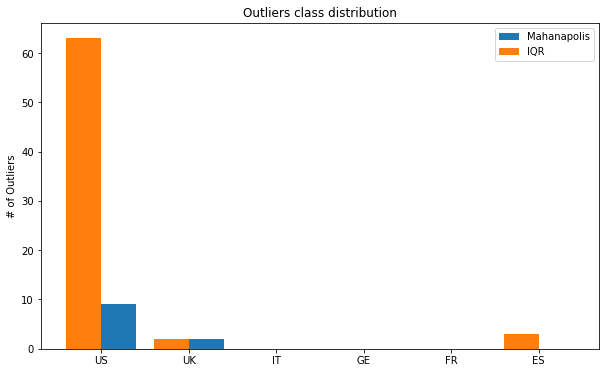

In [33]:
fig = plt.figure(figsize=(10,6))

maha_counts=language[outliers_maha_df].value_counts(sort=False)[::-1]
iqr_counts=language[outliers_iqr_df].value_counts(sort=False)[::-1]
  
X_axis = np.arange(len(language.unique()))
  
plt.bar(X_axis + 0.2, maha_counts, 0.4, label = 'Mahanapolis')
plt.bar(X_axis - 0.2, iqr_counts, 0.4, label = 'IQR')
  
plt.xticks(X_axis, language.unique()[::-1])
plt.xlabel("")
plt.ylabel("# of Outliers")
plt.title("Outliers class distribution")
plt.legend()
plt.show()

**Outlier Removal Tradeoff:**
-------------------------------------------
- we might run the risk of information loss which will cause our models to have a lower accuracy specially with the limited data in hand
- both outliers detectors affected by the class imbalance i.e. bias towards the majority class
- According to UCI, the collected data is noise free

<!-- actually play with threshold and see how it affects the accuracy of our classification models -->

for the abovementioned reasons, only a dataset split by removing shared outliers between IQR and mahanapolis will be examined for classification 

In [34]:
print("Mahalanabois Outliers Indices: {}\n".format(outliers_indices_maha))

Mahalanabois Outliers Indices: [124 136 224 226 229 231 232 286 287 295 322]



In [35]:
print("IQR Outliers Indices: {}\n".format(outliers_indices_iqr))

IQR Outliers Indices: [ 14  22  27 157 162 171 194 204 213 215 219 221 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 263 284 285 286 287 291 292 293 294 295 298 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328]



In [36]:
def commonElements(arr): 
    # initialize result with first array as a set 
    result = set(arr[0]) 
    for currSet in arr[1:]: 
        result.intersection_update(currSet) 
  
    return list(result) 

In [37]:
outliers_indices=[outliers_indices_iqr,outliers_indices_maha,np.asarray(index).flatten()]
print("Counter of common outliers between IQR & Mahalanobis:", len(commonElements(outliers_indices)))

Counter of common outliers between IQR & Mahalanobis: 9


In [38]:
noise = df.index.isin(commonElements(outliers_indices))
noisefree_df = df[~noise]
print('Noise-free dataset split of Shape:{} is created'.format(noisefree_df.shape))
#         print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))

#note that indexes of >320 still appears because idx is related to rows and intermediate idx deleted==> idx.shap=261

Noise-free dataset split of Shape:(320, 13) is created


## 7. Multicollinearity Detection

Collinearity is a linear association between two variables. Multicollinearity is a situation where the correlations among subsets of the variables
Two methods of detection will be examined against the dataset

### 7.1 Pearson correlation

Pearson correlation coefficient (PCC) is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.


Given a pair of random variables $(X,Y)$ the formula for Pearson correlation coefficient $\rho$ is:

\begin{equation}
\label{eq:dotp}
\rho_{X,Y} = \frac {cov(X,Y)} {\sigma_X \sigma_Y}, 
\end{equation}
where $\sigma$ is the standard deviation ...

In general, **an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity**

In [202]:
#class to return the matrix of p-value of predictors 
#The P-value is the probability that you would have found the current result if the correlation coefficient were in 
#fact zero (null hypothesis). If this probability is lower than the conventional 5% (P<0.05) the 
#correlation coefficient is called statistically significant
from scipy import stats
def corr_sig(predictors=None):
    p_matrix = np.zeros(shape=(predictors.shape[1],predictors.shape[1]))
    for col in predictors.columns:
        for col2 in predictors.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(predictors[col],predictors[col2])
            p_matrix[predictors.columns.to_list().index(col),predictors.columns.to_list().index(col2)] = p
    return p_matrix

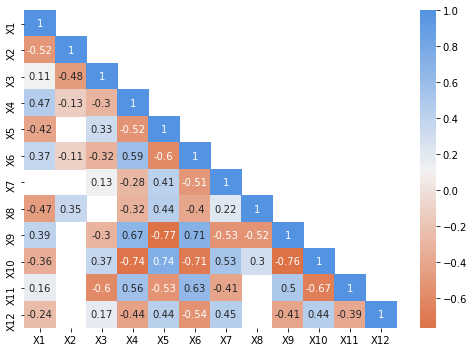

In [203]:
# Corr.Plot of Example Data with only Sig. Correlations (plotting with only significant p-value correlation (alpha < .05))

p_values = corr_sig(predictors)

mask = np.invert(np.tril(p_values<0.05)) #0.000000000000000000000000001

#Compute pairwise correlation of columns .corr() default method=pearson
#obviously another way is to return the matrix of _ in the above class
corrmat = predictors.corr() 
top_corr_predictors= corrmat.index
plt.figure(figsize=(7,5))

g=sns.heatmap(df[top_corr_predictors].corr(),annot=True,cmap=sns.diverging_palette(25, 250, s=75, l=60,n=200), mask=mask)
plt.tight_layout()

considering  an absolute correlation coefficient of >0.7 from the heatmap following strong correlations found:

- X5,X6 with X9
- X4,X5,X6 with X10
- X9 with X10

Apparently, will lose info if X9 or X10 is droppped since they go together, so the right decision is to drop X4,X5,X6 

In [204]:
# from ipywidgets import interact, FloatSlider

# def show_pal4(h_neg, h_pos, s, l, center):
#     sns.palplot(sns.diverging_palette(h_neg, h_pos, n=10, s=s, l=l, center=center))
    
# interact(show_pal4, h_neg=FloatSlider(250, max=360), h_pos=FloatSlider(25, max=360), s=FloatSlider(75, max=99), 
#          l=FloatSlider(60, max=99), center=['light', 'dark']);

### 5.2 Variance Inflation Factor (VIF)

more robust method

some say independent variable with VIF>10 is collinear
some say independent variable with VIF>5 is collinear (more strict)
anyway is between them

In [205]:
# #function copied from stat.stackexchange.com

# from statsmodels.stats.outliers_influence import variance_inflation_factor    
# def calculate_vif_(X, thresh=6): #threshold to be tuned between 5 and 10 according to classsification results
#     variables = list(range(X.shape[1]))
#     dropped = True
#     while dropped:
#         dropped = False
#         vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
#                for ix in range(X.iloc[:, variables].shape[1])]

#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
#                   '\' at index: ' + str(maxloc))
#             del variables[maxloc]
#             dropped = True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X.iloc[:, variables]

In [206]:
# r=calculate_vif_(predictors,4) 

### 5.3 Hieracichal clustering

It's a type of clustering requires the user to specify a measure of dissimilarity between (disjoint) groups of observations, based on the pairwise dissimilarities among the observations in the two groups.
As the name suggests, they produce hierarchical representations in which the clusters at each level of the hierarchy are created by merging clusters at the next lower level. At the lowest level, each cluster contains a single observation. At the highest level there is only one cluster containing all of the data.

Strategies for hierarchical clustering divide into two basic paradigms: agglomerative (bottom-up) and divisive (top-down). 

**Agglomerative** strategies start at the bottom and at each level recursively merge a selected pair of clusters into a single cluster. This produces a grouping at the next higher level with one less cluster. The pair chosen for merging consist of the two groups with the smallest intergroup dissimilarity

The graph we plot after performing agglomerative clustering on data is called **Dendrogram**.

Most agglomerative and some divisive methods (when viewed bottom￾up) possess a monotonicity property. That is, the dissimilarity between
merged clusters is monotone increasing with the level of the merger. Thus
the binary tree can be plotted so that the height of each node is proportional
to the value of the intergroup dissimilarity between its two daughters. The
terminal nodes representing individual observations are all plotted at zero
height. This type of graphical display is called a dendrogram.

 Figure 14.12 shows the dendrogram resulting
from agglomerative clustering with average linkage; agglomerative cluster￾ing 

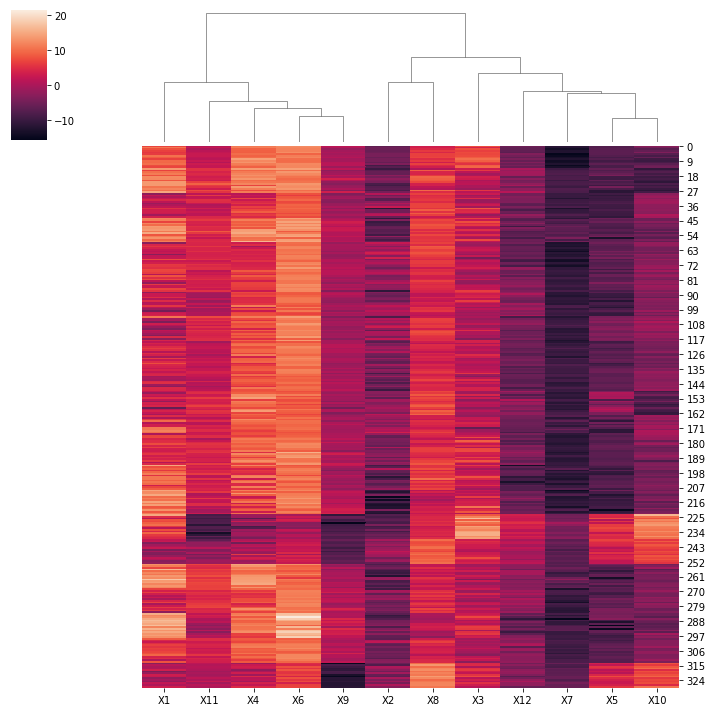

In [40]:
# check multi pairwise method and metrics to find best
g = sns.clustermap(predictors, row_cluster= False,  metric="correlation")
# 7 is a cluster in any euclidean metric calculated based 
# hamming and jaccard and mahalanobis are not working

In [48]:
#trial and error
# @knn (k=3)
# df_colfree=df.drop(columns=['X4','X5','X6','X7'],axis=1) #bad

#all three comp 
# df_colfree=df.drop(columns=['X4','X5','X6'],axis=1)#0.6752641623609366
# df_colfree=df.drop(columns=['X4','X5','X7'],axis=1)#F1 score on test set: 0.7674608993157381
# df_colfree=df.drop(columns=['X4','X6','X7'],axis=1)#F1 score on test set: 0.7898923444976076
# df_colfree=df.drop(columns=['X5','X6','X7'],axis=1)#0.7070455550781195

#vif only
df_colfree=df.drop(columns=['X6','X7']) #0.8500541125541126
# df_colfree=df.drop(columns=['X4','X6','X7'],axis=1)#F1 score on test set: 0.7898923444976076

## 8. Dimensionality Reduction

Principal component analysis (PCA) is is unsupervised learning that uses an orthogonal transformation to convert the variables of a dataset into a new set of variables which are linearly uncorrelated. The principal components are ranked according to the variance of data along them. 


\begin{definition}\
  Given observations $x_i^{(k)}$ of random variables $X^{(k)}$, want
  to find <span class="mark">linearly uncorrelated</span> principal components.

  - Write $X = (T{x}_1 | \cdots | T{x}_\ell) \in RR^{N \times \ell}$.
  
  - Calculate Singular Value Decomposition $X = U S V^t$, 
  
  - Then the principal components are the variables \[ Y^{(j)} = \sum_k U_{kj} X^{(k)}. \]

\end{definition}

Most of the variance is captured by $Y^{(1)}$; second to most is captured by $Y^{(2)}$; and so on

**For the above mentioned procedure to be correct, data need to be centered and scaled**

This technique can be used to reduce the dimensionality of the dataset by considering just the most important principal components and wether it will help classifing the accent recognition dataset i.e. if the variance help in seperating classes

sklearn.decomposition.PCA class uses Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.


In [41]:
from sklearn.decomposition import PCA

n_components=5
pca = PCA(n_components, random_state=42)

#the following statemend can be done through
#from sklearn.preprocessing import scale, normalize
#norm_predictors = normalize(predictors)

norm_predictors = (predictors - predictors.mean()) / predictors.std()
#pca.fit_transform does not normalize data automatically

X_pca = pca.fit_transform(norm_predictors)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_components)]) 

X_pca['language_coded']=df.iloc[:,12:13]

In [42]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[5.49131308 2.03885062 1.04249918 0.8898288  0.64527465]
[0.45760942 0.16990422 0.08687493 0.0741524  0.05377289]
0.8423138612656601


- 4 components are enough to explain about 79% 
- 5 components are enough to explain about 84% 

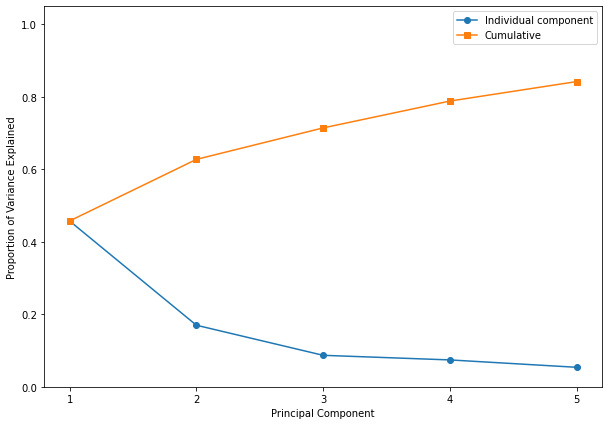

In [43]:
plt.figure(figsize=(10,7))
plt.plot([1,2,3,4,5], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
#1,2,3,4 to avoid PCA1 is at 0 in xscale

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.8,5.2)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5])
plt.legend();

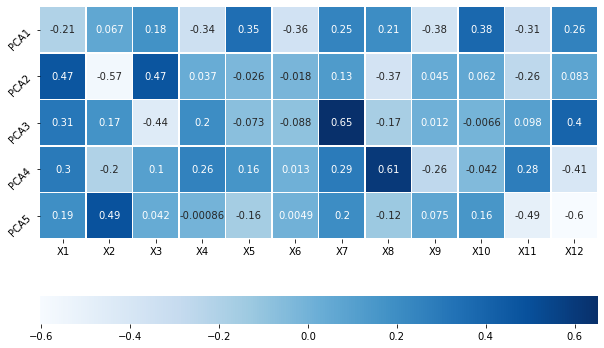

In [44]:
#Effect of original predictors (variables) on each components
#too dark = too positive effect , too light= too negative effect
#to do:just abs() coz all we need now is the effect whether its + or -
plt.figure(figsize=(10,7))
ax = sns.heatmap(pca.components_, 
                 linewidths=0.5,
                 annot=True,
                 cmap='Blues',
                 yticklabels=[ "PCA"+str(v) for v in range(1,pca.n_components_+1)],
                 xticklabels=list(predictors.columns),
                 cbar_kws={"orientation": "horizontal"})
plt.setp(ax.get_yticklabels(), rotation=45)
ax.set_aspect("equal")

PCA1 is increased with X5 and X10 and decreased with X4,X6,X9. This suggests that these five coeffiecient goes together, If one increases, then the remaining ones tend to increase/decrease. So this component PCA1 can be viewed as a measure of the quality of X4,X5,X6,X9 and X10

PCA1 is more affected by X9,X10 than X4,X5,X6 (the same result we reached in the multicollinearity section)

## 9. Classification 

### 9.1 Imbalanced Dataset Classification 

The machine-learning literature on this topic has essentially developed two common solution strategies:
1.	Restore balance on the training set by **undersampling** the large class or by **oversampling** the small class, to prevent bias from arising in the first place.
2.  modify the **costs of misclassification** to prevent bias by penalizing learning algorithms that increase the cost of classification mistakes on the minority class. this technique is implemented in python using the argument **class_weight=’balanced’** within classifier models during training to penalize mistakes on the minority class by an amount proportional to how under-represented it is.We also want to include the argument **probability=True** if we want to enable probability estimates for SVM algorithms.

### 9.2 Classification Metric

In learning imbalanced data, the overall classification accuracy is often not an appropriate measure of performance.  A trivial classifier that predicts every case as the majority class can still achieve very high accuracy. 

Metrics such as true negative rate, true positive rate, precision, recall, and F-measure are commonly used 

Since there is no distinction between whether Precision is more important or Recall in the accent recognition case, we combine them

**F1-measure** is the harmonic mean of precision and recall:

In practice, when we try to increase the precision of our model, the recall goes down and vice-versa. The F1-score captures both the trends in a single value.

\begin{equation}
F_1score = 2 \left[ \frac {Precision \times Recall} {Precision+ Recall} \right]
\end{equation}

In the multi-class case, there are three ways to generalize F1 scores:
- **macro-averaged** F1, and it weighs each class equally.
- **micro-averaged** F1, and it weighs each sample equally.
- **Weighted-averaged**  each classes’s contribution to the average is weighted by its size

To give equal weight to each class, use macro-averaging

### 9.3 K-fold Cross-Validation

for estimating prediction error **K-fold cross-validation** uses part of the available data to fit the model, and a different part to test it. We split the data into K roughly equal-sized parts and for the kth part (third above), we fit the model to the other K −1 parts
of the data, and calculate the prediction error of the fitted model when
predicting the kth part of the data. We do this for k = 1, 2,...,K and
combine the K estimates of prediction error.

Let $κ$ : {1,...,N} → {1,...,K} be an indexing function that indicates the partition to which observation $i$ is allocated by
the randomization. Denote by $f^{−k}(x)$ the fitted function, computed with the $kth$ part of the data removed. Then the cross-validation estimate of prediction error is
\begin{equation}\label{eq:}
CV(f)= \sum_{i=1}^{N} L(y_i,f^{-k(i)}(x_i))
\end{equation}

Typical choices of K are 5 or 10 

sklearn package provides the class **StratifiedKFold**; a cross-validation object returns stratified folds. The folds are made by preserving the percentage of samples for each class as shown below


<img src="images/3.png" alt="Drawing" style="width: 500px;" />

### 9.4 Classification Models

The following classification models gives competent results on the speaker accent recognition dataset: 
#### 9.4.1 K-Nearest Neighbour:
Nearest-neighbor methods use those observations in the training set $T$ closest in input space to $x$ to form $\hat{Y}$ . Specifically, the k-nearest neighbor fit for $\hat{Y}$ is defined as follows:

\[\hat{Y}(x)=\frac{1}{k}  \sum_{{x_i}\in {N_k (x)}} y_i\]

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. Closeness implies a metric, Euclidean distance is the default choice in sklearn nearest neighbour algorithm. 
So, in words, we find the $k$ observations with $x_i$ closest to $x$ in input space, and average their responses.

thae k-nearest-neighbor fits have a single parameter, the number of neighbors k, as k increases bias increases and variance decreases and so a small value of k could lead to **overfitting** as well as a big value of k can lead to **underfitting** 

#### 9.4.2 Support Vector Machine:

When the classes are not separable by a linear boundary, the support vector machine (SVM) classifier maps sample $x_i$ into a feature space of higher dimensions $\phi (x)$ in which the classes can be linearly separated. This results in a non-linear decision boundary in the original dimensions.

As the vectors $x_i$ appear as inner products in the optimization problem to find the saperating hyperplane, the mapping function $\phi(x)$ does not need to be explicitly specified, rather requires only knowledge of the kernel function:

\[K(x_1,x_2)=\phi(x_1)^Tϕ(x_2)\]

The effective hyperparameters of a SVM to be tuned and implemented using sklearn library are:
In the hyperparameter tuning we consider the following two kernels:

1- the kerenel function and the functions chosen are the following:
- linear kernel:               $K(x_1,x_2)= x_1⋅x_2$
- Radial Basis Function (RBF): $K(x_1,x_2)=exp (−\gamma∥x_1−x_2∥^2)$

2- C: the cost parameter, a large value of C will discourage any positive slack variables and lead to an overfit wiggly boundary in the original feature space; a small value of C will causes $f(x)$ and hence the boundary to be smoother.

3- Gamma (RBF parameter): as parameter C, The higher the gamma the more chance of overfitting

#### 9.4.3 Random Forest
 An average of $B$ i.i.d. random variables, each with variance $\sigma^2$, has variance $\frac{1}{B} \sigma^2$. If the variables are simply i.d. (identically distributed, but not necessarily independent) with positive pairwise correlation $\rho$, the variance of the average to be optimized is

\[\rho \sigma^2+\frac{1-\rho}{B} \sigma^2\]

The idea in **random forests** is to improve the variance reduction of bagging by reducing the correlation between the trees, without increasing the variance too much. This is achieved in the tree-growing process (to the bootstrapped data) through random selection of the input variables $(m =<p)$(with selecting best variables at each step as candidate for splitting).
When used for classification, a random forest obtains a class vote from each tree, and then classifies using majority vote

For classification, the default value for m is $\sqrt{p}$ and the minimum node size is one.

Random forest parameters to be considered in implementation using sklearn library:
- Number of trees in random forest
- Number of features to consider at every split
- Maximum number of levels in tree
- Minimum number of samples required to split a node
- Minimum number of samples required at each leaf node
- Method of selecting samples for training each tree (bootstrap or not)

**Note: Linear Discriminant Analysis and Logistic Regression are used along the abovementioned classifier, but since both gave poor results, they are excluded from the report. Same goes for evaluation metrics precision and recall**

### 9.5  Implementation Framework

<img src="images/4.3.png" alt="Drawing" style="width: 600px;" />

The figure above shows the classification framework for the imbalanced and balanced cases. Stratified **10-folds** is performed for cross-validation 

In [45]:
from sklearn.model_selection import train_test_split as tts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time as time

In [601]:
test_size=0.3
SEED=20 #to correcty compare results of the different datasets splits use the same random_state seed (to pick same instances for df,pca,colfree) only noisefree can't pick the same indices

In [638]:
train_data, test_data, train_labels, test_labels = tts(predictors,target, test_size=test_size, stratify=target, random_state=SEED)
train_colfree, test_colfree, colfree_train_labels, colfree_test_labels = tts(df_colfree.drop('language_coded', axis=1), df_colfree['language_coded'], test_size=test_size, stratify=df_colfree['language_coded'], random_state=SEED)
train_noisefree, test_noisefree, trainlabels_noisefree, testlabels_noisefree = tts(noisefree_df.iloc[:,0:12], noisefree_df.iloc[:,12:13], test_size=test_size, stratify=noisefree_df.iloc[:,12:13], random_state=SEED)

In [639]:
#prepare pca-transformed dataset for classification
norm_predictors = (train_data - train_data.mean()) / train_data.std()
pca_train = pca.fit_transform(norm_predictors)
norm_predictors = (test_data - test_data.mean()) / test_data.std()
pca_test = pca.fit_transform(norm_predictors)

In [648]:
datasets={
              'Original dataset':[train_data,train_labels,test_data,test_labels],
#               'PCA':[pca_train,train_labels, pca_test,test_labels],
#               'noise-free':[train_noisefree, trainlabels_noisefree, test_noisefree, testlabels_noisefree],
#               'coll-free':[train_colfree, colfree_train_labels, test_colfree,colfree_test_labels]
}

### 9.6 Imbalanced dataset classification

In [649]:
 # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [500,1000] #list(range(20,120,10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #list(range(2, 16, 2)) + [None]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini','entropy']

knears_params = {"n_neighbors": list(range(3,7,2))}
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver":['sag' ,'saga', 'liblinear','newton-cg', 'lbfgs'] }
# random_state int, RandomState instance, default=None
svc_params = {'C': np.logspace(1, 3, 3), 'kernel': ['rbf', 'linear'],'gamma':np.logspace(-3, -1, 3)}

rf_params = {  'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

lda_params={'solver':['lsqr','eigen','svd']}

In [606]:
np.linspace(start = 500, stop = 1000, num = 6)

array([ 500.,  600.,  700.,  800.,  900., 1000.])

In [608]:
 # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 6)] #list(range(20,120,10))
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [110]
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [False]
criterion = ['gini','entropy']

knears_params = {"n_neighbors": list(range(3,7,2))}
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver":['liblinear','newton-cg', 'lbfgs'] }
# random_state int, RandomState instance, default=None
svc_params = {'C': np.logspace(1, 1, 1), 'kernel': ['rbf'],'gamma':np.logspace(-2, -2, 1)}

rf_params = {  'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

lda_params={'solver':['lsqr']}

In [650]:
params = {
        '1':knears_params,
        '2':log_reg_params,
        '3':svc_params,
        '4':rf_params,
        '5':lda_params,
         }

In [651]:
#basline classifiers
classifiers = {
        "KNearest": KNeighborsClassifier(),       #3 ok, 5 overfittting
        "LogisiticRegression": LogisticRegression(),
        "Support Vector Classifier": SVC(),         #  (probability=False) is compatible with imbalanced dataset 
        "Rforest":RandomForestClassifier(),        #random_state= 0
        "LDA":LinearDiscriminantAnalysis(),
              }    

In [652]:
# cv parameters
splits=10
cv_ = StratifiedKFold(n_splits=splits, random_state=SEED, shuffle=True) 
# sss = StratifiedKFold(n_splits=splits, shuffle=False)
#https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn

In [653]:
def imbalanced_clf (cv=cv_,ds=datasets,clf=classifiers,par=params):
    df_results = pd.DataFrame()
    for key in ds:
        X_train=ds[key][0]
        y_train=ds[key][1]
        X_test=ds[key][2]
        y_test=ds[key][3]

        accuracy_lst = []
        precision_lst = []
        recall_lst = []
        f1_lst = []
        auc_lst = []
        
        for (key1,classifier),(key2,parameter) in zip(clf.items(),par.items()):
            start_time = time.time()
            grid=GridSearchCV(classifier, parameter,cv=cv,scoring='f1_weighted')
            grid.fit(X_train, y_train)
            best_est = grid.best_estimator_
            prediction = best_est.predict(X_train)
            
            training_score = cross_val_score(best_est, X_train, y_train, scoring='f1_weighted',cv=cv)
            row = {
                'Dataset split': key,
                'model':classifier.__class__.__name__,
                'run_time': format(round((time.time() - start_time)/60,2)),
                'F1 CV score': round(training_score.mean(), 2),
                'F1 score on test set': round(f1_score(y_test, best_est.predict(X_test), average='weighted'),4),
                'Precision score on test set': round(precision_score(y_test, best_est.predict(X_test), average='weighted'),4),
                'Recall score on test set': round(recall_score(y_test, best_est.predict(X_test), average='weighted'),4),
                'best parameters':grid.best_params_,
                   }
            df_results = df_results.append(row, ignore_index=True) 
    return df_results

In [ ]:
imbalanced_clf().sort_values(by='F1 score on test set')
#seed=20
#test=30%

In [223]:
imbalanced_clf().sort_values(by='F1 score on test set')
#seed=42
#test=30%

,Dataset split,F1 CV score,F1 score on test set,best parameters,model,run_time
9,PCA,0.48,0.3530,{'solver': 'lsqr'},LinearDiscriminantAnalysis,0.0
6,PCA,0.52,0.3648,{'C': 10},LogisticRegression,0.01
7,PCA,0.64,0.3960,"{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}",SVC,1.54
8,PCA,0.64,0.4000,"{'bootstrap': False, 'max_depth': 100, 'max_fe...",RandomForestClassifier,401.26
5,PCA,0.68,0.4255,{'n_neighbors': 3},KNeighborsClassifier,0.0
1,Original dataset,0.69,0.6621,{'C': 1},LogisticRegression,0.02
19,coll-free,0.63,0.6677,{'solver': 'lsqr'},LinearDiscriminantAnalysis,0.0
15,coll-free,0.74,0.6701,{'n_neighbors': 5},KNeighborsClassifier,0.0
16,coll-free,0.69,0.6914,{'C': 0.1},LogisticRegression,0.02
18,coll-free,0.75,0.6945,"{'bootstrap': False, 'max_depth': 110, 'max_fe...",RandomForestClassifier,423.62


Results for the imbalanced case shows the following:

- Both original dataset and outliers free dataset gives already high performance results on SVM (83%), KNN (75% -79%) and fair results on Random Forest (73% - 74%) with sign of silght overfitting in Random forest
- Random forests are built on decision trees, and decision trees are sensitive to class imbalance. Each tree is built on a bag, and each bag is a uniform random sample from the data (with replacement). Therefore each tree will be biased in the same direction and magnitude (on average) by class imbalance.
- Performance dropped significantly for the same classifiers on Collinearity-free dataset
- PCA-reduced datasets gave very poor results
    -  PCA for MFCC not meaningful since MFCC is already a transformed data
    - In classification problem, when the differentiating characteristics of the classes are not reflected in variance of the variables, PCA may not be a good choice of data processing. This is because PCA does not take into account class information when calculating the principal components.
- LDA and Logistic regression are not optimal classifiers for the dataset (a sign of non-linear decision boundary between classes). Moreover:
  - as discussed before, predictors are coming from non gaussian distribution (another possible reason for the LDA to fail)
  - LR does not perform well in the presence of collinearity

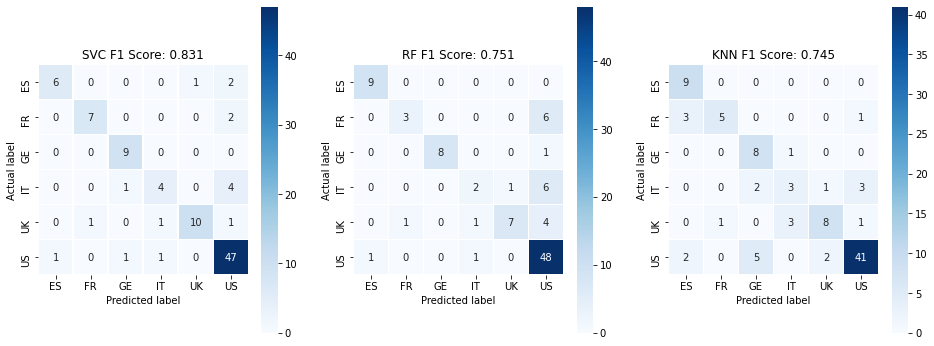

In [335]:
from sklearn.metrics import confusion_matrix

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))

classes=['ES','FR','GE','IT','UK','US']

svc=SVC(C=10.0, gamma=0.01)
svc.fit(train_data, train_labels)
cm1=confusion_matrix(test_labels, svc.predict(test_data),labels=[0,1,2,3,4,5])

g1=sns.heatmap(cm1, annot=True, linewidths=.5, square = True, cmap = 'Blues',xticklabels=classes, yticklabels=classes,ax=ax1);
g1.set_ylabel('Actual label')
g1.set_xlabel('Predicted label')
svc_title='SVC F1 Score: {0}'.format(round(f1_score(test_labels, svc.predict(test_data), average='weighted'),3))
ax1.set_title(svc_title)

rf=RandomForestClassifier(n_estimators=500,
               criterion= 'gini',
               max_features= 'sqrt',
               max_depth= 110,
               min_samples_split=2,
               min_samples_leaf=1,
               bootstrap=False)
rf.fit(train_data, train_labels)
cm2=confusion_matrix(test_labels, rf.predict(test_data),labels=[0,1,2,3,4,5])

g2=sns.heatmap(cm2, annot=True, linewidths=.5, square = True, cmap = 'Blues',xticklabels=classes, yticklabels=classes,ax=ax2);
g2.set_ylabel('Actual label')
g2.set_xlabel('Predicted label')
rf_title='RF F1 Score: {0}'.format(round(f1_score(test_labels, rf.predict(test_data), average='weighted'),3))
ax2.set_title(rf_title)

knn=KNeighborsClassifier(5)
knn.fit(train_data, train_labels)
cm3=confusion_matrix(test_labels, knn.predict(test_data),labels=[0,1,2,3,4,5])

g2=sns.heatmap(cm3, annot=True, linewidths=.5, square = True, cmap = 'Blues',xticklabels=classes, yticklabels=classes,ax=ax3);
g2.set_ylabel('Actual label')
g2.set_xlabel('Predicted label')
knn_title='KNN F1 Score: {0}'.format(round(f1_score(test_labels, knn.predict(test_data), average='weighted'),3))
ax3.set_title(knn_title)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, knn.predict(test_data)))

### 9.7 Imbalanced dataset classification by modifying classifiers' cost function

By considering only original and Outlier-free datasets and best performed classifiers with best performed hyperparameters, the same classification implemented on modified classifiers' cost function by penalizing mistakes on the minority class using **class_weight='balanced'**

In [233]:
pen_datasets=
            {
              'Original dataset':[train_data,train_labels,test_data,test_labels],
              'noise-free':[train_noisefree, trainlabels_noisefree, test_noisefree, testlabels_noisefree],
            }

In [291]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)] #list(range(20,120,10))

rf_params = {  'n_estimators': n_estimators,
               'criterion' : ['gini','entropy'],
               'max_features': ['sqrt'],
               'max_depth': [None],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'bootstrap': [False],
               'class_weight':['balanced']
            }
svc_params = {'C': np.logspace(1, 3, 3), 
              'kernel': ['rbf', 'linear'],
              'gamma':np.logspace(-3, -1, 3),
              'class_weight':['balanced'],
              'probability':[True]}
pen_params = {
        '1':svc_params,
        '2':rf_params,
             }

In [287]:
#basline classifiers
pen_classifiers = {
        "Support Vector Classifier": SVC(),         #  (probability=False) is compatible with imbalanced dataset 
        "Rforest":RandomForestClassifier(),        #random_state= 0
                        }    

In [289]:
d=imbalanced_clf(cv=cv_,ds=pen_datasets,clf=pen_classifiers,par=pen_params).sort_values(by='F1 score on test set')

In [290]:
d.head(4)

,Dataset split,F1 CV score,F1 score on test set,best parameters,model,run_time
1,Original dataset,0.77,0.6649,"{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",RandomForestClassifier,2.38
3,noise-free,0.79,0.7262,"{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}",RandomForestClassifier,2.45
0,Original dataset,0.79,0.8037,"{'C': 10.0, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}",SVC,3.11
2,noise-free,0.82,0.8200,"{'C': 10.0, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}",SVC,3.0


by modifying the **costs of misclassification**, performance dropped slightly for SVC and Random Forest

## 10. Dataset Balancing:

Since the size of the dataset is relatively small, only ***oversampling*** of the minority classes using two of the most common technique will be considered

#### 1- Synthetic Minority Oversampling Technique (SMOTE)

 Considering a sample $x_i$, a new sample $x_{new}$ will be generated considering its $k$ neareast-neighbors. Then, one of these nearest-neighbors $x_{zi}$ is selected and a sample is generated as follows:\[x_{new} = x_i + \lambda \times (x_{zi} - x_i)\]
 where $\lambda$ is a random number in the range [0, 1]. This interpolation will create a sample on the line between $x_{i}$ and $x_{zi}$
 
 <img src="images/9.1.png" alt="Drawing" style="width: 300px;" />

#### 2-  Adaptive Synthetic (ADASYN) 

ADASYN uses the same algorithms to generate samples, the key difference is that ADASYN uses a **density distribution**, as a criterion to automatically decide the number of synthetic samples that must be generated for each minority sample by adaptively changing the weights of the different minority samples to compensate for the skewed distributions. SMOTE generates the same number of synthetic samples for each original minority sample.

For multiple classes classification, both ADASYN and SMOTE need information regarding the neighbourhood of each sample used for sample generation. They are using a **one-vs-rest** approach by selecting each targeted class and computing the necessary statistics against the rest of the data set which are grouped in a single class.

**imbalanced-learn** is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. It is compatible with scikit-learn.

In [96]:
# conda install -c glemaitre imbalanced-learn

SMOTE over-sampling:
5    165
4    165
3    165
2    165
1    165
0    165
Name: language_coded, dtype: int64


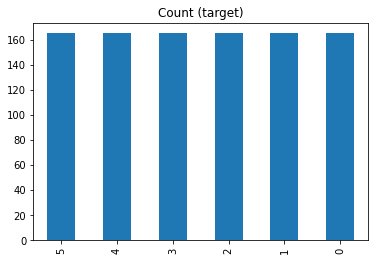

In [57]:
# import imblearn
from imblearn.over_sampling import SMOTE 
X = df.drop('language_coded', axis=1)
Y = df['language_coded']
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)
# df_balanced = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['language_coded'])], axis=1) #data split#4
print('SMOTE over-sampling:')
print(Y_res.value_counts())
Y_res.value_counts().plot(kind='bar', title='Count (target)');

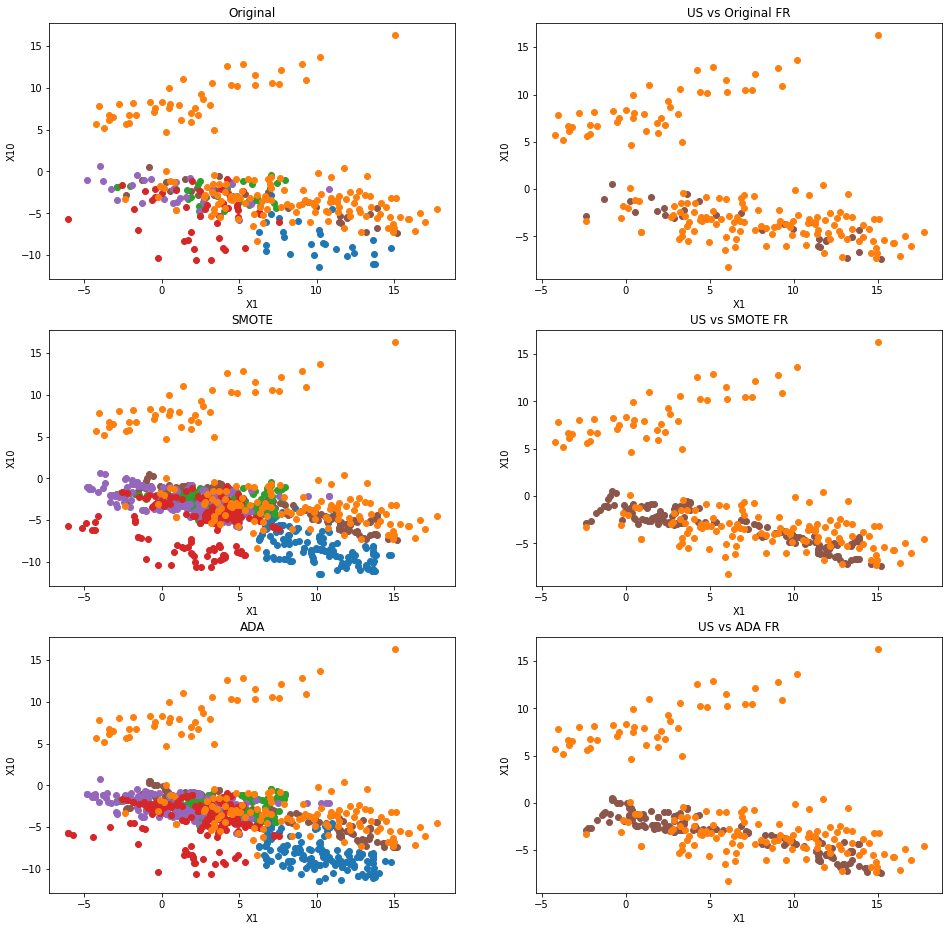

In [58]:
#plot 
from imblearn.over_sampling import ADASYN
from numpy import where

fig, axs = plt.subplots(3,2,figsize=(16,16))

# scatter plot of examples by class label
from numpy import array
g = array(predictors.values.tolist())
k = language.values.tolist() 
k=np.array(k).T

import itertools
colors = itertools.cycle(["tab:blue", "tab:brown", "tab:green", "tab:purple","tab:red","tab:orange"])
colors_ = itertools.cycle(["tab:brown", "tab:orange"])

from collections import Counter
counter=Counter(language)
for label, _ in counter.items():
    row_ix = where(k == label)[0]
    axs[0,0].scatter(g[row_ix, 0], g[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[0,0].set(xlabel='X1', ylabel='X10', title='Original')

for label in ['FR','US']:    
    row_ix = where(k == label)[0]
    axs[0,1].scatter(g[row_ix, 0], g[row_ix, 9], label=str(label), color=next(colors_))
    axs[0,1].set(xlabel='X1', ylabel='X10', title='US vs Original FR')

oversample = SMOTE()
g_smote, k_smote = oversample.fit_resample(g, k)

# for label, _ in counter.items():
for label in ['FR','US']:    
    row_ix = where(k_smote == label)[0]
    axs[1,1].scatter(g_smote[row_ix, 0], g_smote[row_ix, 9], label=str(label), color=next(colors_))
    axs[1,1].set(xlabel='X1', ylabel='X10', title='US vs SMOTE FR')
    
for label, _ in counter.items():
    row_ix = where(k_smote == label)[0]
    axs[1,0].scatter(g_smote[row_ix, 0], g_smote[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[1,0].set(xlabel='X1', ylabel='X10', title='SMOTE')

ada = ADASYN(random_state = 101)
g_adasyn, k_adasyn = ada.fit_resample(g, k)

for label in ['FR','US']:    
    row_ix = where(k_adasyn == label)[0]
    axs[2,1].scatter(g_adasyn[row_ix, 0], g_adasyn[row_ix, 9], label=str(label), color=next(colors_))
    axs[2,1].set(xlabel='X1', ylabel='X10', title='US vs ADASYN FR')
    
for label, _ in counter.items():
    row_ix = where(k_adasyn == label)[0]
    axs[2,0].scatter(g_adasyn[row_ix, 0], g_adasyn[row_ix, 9], label=str(label), color=next(colors)) #X1 ,X10 choosen from orange 'find informative projections'
    axs[2,0].set(xlabel='X1', ylabel='X10', title='ADA')
plt.show()

### 10.1 Oversampled Dataset Classification

Cross-Validaion for oversampled dataset is tricky and need a bit of work on coding mainly **to avoid validating a training fold on synthetic data** as shown on the example below
**synthetic data should only be used for training**, and neiher for validation nor for testing 


<img src="images/5.1.png" alt="Drawing" style="width: 700px;" />

In [626]:
SEED=20

In [627]:
train_data, test_data, train_labels, test_labels = tts(predictors,target, test_size=test_size, stratify=target, random_state=SEED)
train_noisefree, test_noisefree, trainlabels_noisefree, testlabels_noisefree = tts(noisefree_df.iloc[:,0:12], noisefree_df.iloc[:,12:13], test_size=test_size, stratify=noisefree_df.iloc[:,12:13], random_state=SEED)

In [628]:
candidate_datasets={
              'Original dataset':[train_data,train_labels,test_data,test_labels],
              'noise-free':[train_noisefree, trainlabels_noisefree, test_noisefree, testlabels_noisefree],
}

In [629]:
svc_params = {'C': np.logspace(1, 1, 1), 
              'kernel': ['rbf'],
              'gamma':np.logspace(-2, -2, 1),
                 }

In [630]:
candidate_params = {
        '1':knears_params,
        '2':svc_params,
         }

In [631]:
candidate_classifiers = {
        "KNearest": KNeighborsClassifier(),       #3 ok, 5 overfittting
        "Support Vector Classifier": SVC(),         #  (probability=False) is compatible with imbalanced dataset 
              }    

In [632]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [633]:
cv_ = StratifiedKFold(n_splits=splits, random_state=42, shuffle=True) 

In [634]:
def bestclfparams_oversamp (mode,cv=cv_,datasets=candidate_datasets,clf=candidate_classifiers,par=candidate_params):
    
    df_results = pd.DataFrame()

    for key in datasets:
        train_pred=datasets[key][0]
        train_y=datasets[key][1]
        test_pred=datasets[key][2]
        test_y=datasets[key][3]

        X_train = train_pred.values
        X_test = test_pred.values
        y_train = train_y.values
        y_test = test_y.values
        
        accuracy_lst = []
        precision_lst = []
        recall_lst = []
        f1_lst = []
        auc_lst = []

#         for key,classifier,paramsname,params in zip(classifiers.items(),params.items()):
        for (key1,classifier),(key2,parameter) in zip(clf.items(),par.items()):
            # grid=GridSearchCV(classifier, parameter)
            start_time = time.time()

            grid=GridSearchCV(classifier, parameter,cv=cv,scoring='f1_macro')

            for train, test in cv.split(X_train, y_train):
                if mode=='sm':
                    pipeline = imbalanced_make_pipeline(SMOTE(random_state = 42,sampling_strategy='minority'), grid)
                if mode=='ada': 
                    pipeline = imbalanced_make_pipeline(ADASYN(random_state = 42), grid)
                    # pipeline = Pipeline([('sm', SMOTE(sampling_strategy='minority')), ('clf', grid)])
                model = pipeline.fit(X_train[train], y_train[train])
                best_est = grid.best_estimator_
                prediction = best_est.predict(X_train[test])
                # print(best_est)
                f1_lst.append(f1_score(y_train[test], prediction,average='weighted')) #weighted is the best calculated on KNN+6folds

            row = {
                'Dataset split': key,
                'model':classifier.__class__.__name__,
                'run_time': format(round((time.time() - start_time)/60,2)),
                'F1 CV score': round(np.mean(f1_lst), 3) * 100,
                'F1 score on test set': round(f1_score(y_test, best_est.predict(X_test), average='weighted'),4)*100,
                'Acc score on test set': round(accuracy_score(y_test, best_est.predict(X_test)),4)*100,
                'pr score on test set': round(precision_score(y_test, best_est.predict(X_test), average='weighted'),4)*100,
                'rec score on test set': round(recall_score(y_test, best_est.predict(X_test), average='weighted'),4)*100,
                'best parameters':grid.best_params_,
                   }
            df_results = df_results.append(row, ignore_index=True) 
    return df_results

In [635]:
# k=bestclfparams_oversamp (mode='sm')
k2=bestclfparams_oversamp (mode='sm')#class weight


In [636]:
column_names=[ 'Dataset split',
                'model',
                'run_time',
                'F1 CV score',
                'F1 score on test set',
                'Acc score on test set',
                'pr score on test set',
                'rec score on test set',
                'best parameters'
             ]

In [637]:
k2.reindex(columns=column_names).sort_values(by='F1 score on test set')
#seed=20

,Dataset split,model,run_time,F1 CV score,F1 score on test set,Acc score on test set,pr score on test set,rec score on test set,best parameters
0,Original dataset,KNeighborsClassifier,0.01,76.7,79.11,78.79,81.02,78.79,{'n_neighbors': 3}
1,Original dataset,SVC,0.01,80.1,81.32,81.82,82.07,81.82,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"
2,noise-free,KNeighborsClassifier,0.01,70.7,85.43,85.42,86.71,85.42,{'n_neighbors': 3}
3,noise-free,SVC,0.01,75.5,86.18,86.46,86.32,86.46,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"


In [537]:
k.reindex(columns=column_names).sort_values(by='F1 score on test set')

,Dataset split,model,run_time,F1 CV score,F1 score on test set,Acc score on test set,pr score on test set,rec score on test set,best parameters
2,noise-free,KNeighborsClassifier,0.01,72.6,70.10,69.79,73.90,69.79,{'n_neighbors': 5}
0,Original dataset,KNeighborsClassifier,0.01,74.6,75.99,75.76,78.51,75.76,{'n_neighbors': 3}
3,noise-free,SVC,0.01,78.0,79.69,80.21,79.86,80.21,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Original dataset,SVC,0.01,78.3,83.07,83.84,83.57,83.84,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"


In [140]:
l=bestclfparams_oversamp (mode='ada')

In [141]:
l.reindex(columns=column_names).sort_values(by='F1 score on test set')

,Dataset split,model,run_time,F1 CV score,F1 score on test set,Acc score on test set,pr score on test set,rec score on test set,best parameters
2,noise-free,KNeighborsClassifier,0.02,72.9,70.37,69.79,78.15,69.79,{'n_neighbors': 3}
0,Original dataset,KNeighborsClassifier,0.02,76.3,72.92,72.73,77.47,72.73,{'n_neighbors': 3}
3,noise-free,SVC,0.02,76.0,79.94,80.21,79.79,80.21,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Original dataset,SVC,0.02,77.8,81.37,81.82,81.81,81.82,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}"


Learning Curves
----------------

In [109]:
#three plots
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 10),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
#         scoring='f1_weighted'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

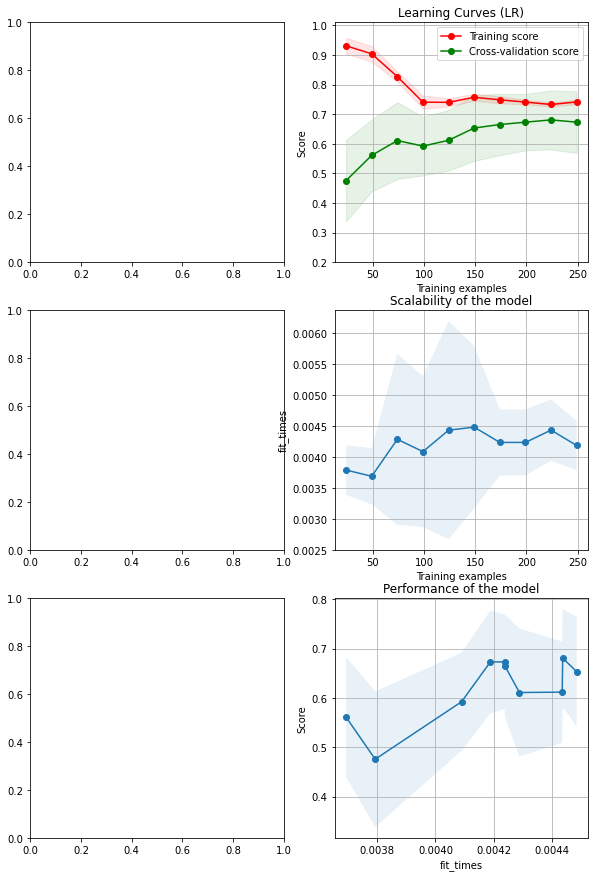

In [114]:
# from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedKFold

fig, axes = plt.subplots(3, 3, figsize=(10, 15))
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=SEED)

# X, y = load_digits(return_X_y=True)

# # Cross validation with 50 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# # cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# cv = StratifiedKFold(n_splits=5,shuffle=False)

title1 = "Learning Curves (RBF)"
estimator1 = SVC(gamma=0.01, C=10)
plot_learning_curve(
    estimator1, title1, train_pred, train_labels, axes=axes[:, 0], ylim=(0.2, 1.01), cv=_cv, n_jobs=4
)

title2 = "Learning Curves (KNN)"
estimator2 = KNeighborsClassifier(3)
plot_learning_curve(
    estimator2, title2, train_pred, train_labels, axes=axes[:, 1], ylim=(0.2, 1.01), cv=_cv, n_jobs=4
)


title3 = "Learning Curves (RF)"
estimator3 = RandomForestClassifier()
plot_learning_curve(
    estimator3, title3, train_pred, train_labels, axes=axes[:, 1], ylim=(0.2, 1.01), cv=_cv, n_jobs=4
)


plt.show()

## Conclusion

A sample of 329 signals, containing 165 US voice and 164 non-US voice(45 UK, 29 ES, and 30 for IT,GR and FR each), is analyzed for the purpose of accent recognition. For each signal, the mean vector of MFCC matrix is used as an input vector for pattern recognition. Then different classifiers are compared based on the MFCC feature. By comparison, Support Vector Machine (RBF) yield the highest average test F1-Score, after using 10-folds cross-validation.

by modifying the costs of misclassification of the minority class the results didn't change much. By performing SMOTE and ADASYN on the minority classes during cross-validation, we managed to elevate the **blala** on the test set by  

In [223]:
#learning curve plot (source sklearn)

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve



# def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="blue")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("RandomForest Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("XGBoost Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [220]:
best_clf=bestclfparams_oversamp (splits,datasets,'sm',clf=classifiers,par=params)

KNearest
f1: 0.7649155331847639
---------------------------------------------------------------------------------------------------------
best model is  KNeighborsClassifier(n_neighbors=3)
---------------------------------------------------------------------------------------------------------
best model F1 score on test set: 0.8531775242301558
best model precision score on test set: 0.8753246753246753
best model recall score on test set: 0.8484848484848485
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------


In [2]:
# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
# plot_learning_curve(best_clf[0], best_clf[1], best_clf[2], best_clf[3], train_pred, train_labels, (0.87, 1.01), cv=sss, n_jobs=4)
# plot_learning_curve(best_clf[0], train_pred, train_labels, (0.87, 1.01), cv=sss, n_jobs=4)

In [353]:
def get_color_with_opacity(color, opacity):
    return "rgba(" + color[4:-1] + ", %.2f)" % opacity

# partially based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1", random_state=SEED)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    trace1 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean - train_scores_std, 
        showlegend=False,
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[0], 0.4),
        ),
    )
    trace2 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean + train_scores_std, 
        showlegend=False,
        fill="tonexty",
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[0], 0.4),
        ),
    )
    trace3 = go.Scatter(
        x=train_sizes, 
        y=train_scores_mean, 
        showlegend=True,
        name="Train score",
        line = dict(
            color = colors[0],
        ),
    )
    
    trace4 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean - test_scores_std, 
        showlegend=False,
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[1], 0.4),
        ),
    )
    trace5 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean + test_scores_std, 
        showlegend=False,
        fill="tonexty",
        mode="lines",
        name="",
        hoverlabel = dict(
            namelength=20
        ),
        line = dict(
            width = 0.1,
            color = get_color_with_opacity(colors[1], 0.4),
        ),
    )
    trace6 = go.Scatter(
        x=train_sizes, 
        y=test_scores_mean, 
        showlegend=True,
        name="Test score",
        line = dict(
            color = colors[1],
        ),
    )
    
    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    layout = go.Layout(
        title=title,
        autosize=True,
        yaxis=dict(
            title='F1 Score',
        ),
        xaxis=dict(
            title="#Training samples",
        ),
        legend=dict(
            x=0.8,
            y=0,
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    return iplot(fig, filename=title)

In [330]:
#basline classifiers
candidate_classifiers_2 = {
        "KNearest": KNeighborsClassifier(3),       #3 ok, 5 overfittting
        "Support Vector Classifier": SVC(C=10.0, gamma=0.01),         #  (probability=False) is compatible with imbalanced dataset 
        "Rforest":RandomForestClassifier(bootstrap= True, max_features= 'sqrt', n_estimators= 242),        #random_state= 0
   }   

In [289]:
def brief_bestclfparams_oversamp (mode,cv=cv_,datasets=candidate_datasets,clf=candidate_classifiers_2):
    for key in datasets:
        train_pred=datasets[key][0]
        train_y=datasets[key][1]
        test_pred=datasets[key][2]
        test_y=datasets[key][3]
        
        X_train = train_pred.values
        X_test = test_pred.values
        y_train = train_y.values
        y_test = test_y.values
        
        print("Oversampled :",key)
        print('---' * 35)
#         print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
#         print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
        # List to append the score and then find the average
        accuracy_lst = []
        precision_lst = []
        recall_lst = []
        f1_lst = []
        auc_lst = []
               
#         best_est_lst=[]

        # grid_rf = GridSearchCV(RandomForestClassifier(), rf_params) RandomForestClassifier(random_state= 0)
        # grid_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params) #RandomForestClassifier(random_state= 0)
        #for key,classifier,paramsname,params in zip(classifiers.items(),params.items()):

        for (key,classifier) in clf.items():
            for train, test in cv.split(X_train, y_train):
                if mode=='sm':
                    pipeline = imbalanced_make_pipeline(SMOTE(random_state=42,sampling_strategy='minority'), classifier)
                if mode=='ada': 
                    pipeline = imbalanced_make_pipeline(ADASYN(random_state = 42), classifier)
                model = pipeline.fit(X_train[train], y_train[train])
                prediction = model.predict(X_train[test])
                f1_lst.append(f1_score(y_train[test], prediction,average='weighted')) #weighted is the best calculated on KNN+6folds
            print("\nClassifier: ", classifier.__class__.__name__)
            print("F1 CV score :", round(np.mean(f1_lst), 3) * 100, "%")
#             print("F1: {}".format(np.mean(f1_lst))) #fe 9orat kasir
            print("F1 score on test set:",round(f1_score(y_test, model.predict(X_test), average='weighted'),4)*100,"%")
            #             print("F1 score on test set:",round(f1_score(y_test, best_est.predict(X_test), average='micro'),4)*100,"%")

#             print("best model precision score on test set:",precision_score(y_test, best_est.predict(X_test), average='weighted'))
#             print("best model recall score on test set:",recall_score(y_test, best_est.predict(X_test), average='weighted'))
            print('---' * 35)
#             best_est_lst.append(best_est)
        print('*****' * 95)
#     return best_est_lst

In [284]:
# for i in range(100):
#     print(i)
#     brief_bestclfparams_oversamp(mode='sm',random_state=i)
brief_bestclfparams_oversamp(mode='sm',random_state=42)

Oversampled : Original dataset
---------------------------------------------------------------------------------------------------------

Classifier:  KNeighborsClassifier
F1 CV score : 77.2 %
F1 score on test set: 75.79 %
---------------------------------------------------------------------------------------------------------

Classifier:  SVC
F1 CV score : 79.60000000000001 %
F1 score on test set: 83.07 %
---------------------------------------------------------------------------------------------------------
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


In [290]:
brief_bestclfparams_oversamp(mode='ada')

Oversampled : Original dataset
---------------------------------------------------------------------------------------------------------

Classifier:  KNeighborsClassifier
F1 CV score : 74.7 %
F1 score on test set: 69.41000000000001 %
---------------------------------------------------------------------------------------------------------

Classifier:  SVC
F1 CV score : 74.3 %
F1 score on test set: 76.31 %
---------------------------------------------------------------------------------------------------------
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


# Results

# Results